In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv(r'C:\Users\AANCHAL\Pictures\Infytrix\Data\final_data.csv')
df2 = pd.read_csv(r'C:\Users\AANCHAL\Pictures\Infytrix\Data\category_metrics.csv')

In [4]:
df1.shape

(18000, 11)

In [5]:
df2.shape

(6, 4)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         18000 non-null  object 
 1   platform_id  18000 non-null  object 
 2   brand_id     18000 non-null  object 
 3   product_id   18000 non-null  object 
 4   units_sold   18000 non-null  int64  
 5   revenue      18000 non-null  float64
 6   category     11577 non-null  object 
 7   price_band   11577 non-null  object 
 8   ad_spend     18000 non-null  float64
 9   clicks       18000 non-null  int64  
 10  impressions  18000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 1.5+ MB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  6 non-null      object 
 1   roas      6 non-null      float64
 2   ctr       6 non-null      float64
 3   avg_sp    6 non-null      float64
dtypes: float64(3), object(1)
memory usage: 324.0+ bytes


# Performance Analysis

### Platform Performance

roas = 0.34 - platform wide spend is inefficient

In [26]:
platform_perf = (
    df1.groupby('platform_id')
       .agg(
           revenue=('revenue', 'sum'),
           ad_spend=('ad_spend', 'sum'),
           clicks=('clicks', 'sum'),
           impressions=('impressions', 'sum')
       )
       .reset_index()
)

platform_perf['roas'] = platform_perf['revenue'] / platform_perf['ad_spend']
platform_perf['ctr'] = platform_perf['clicks'] / platform_perf['impressions']

platform_perf.sort_values('revenue', ascending=False)


,platform_id,revenue,ad_spend,clicks,impressions,roas,ctr
0,MKP_1,54508651.73,1.600338e+08,45482209,1524126421,0.340607,0.029841


## Category performance

Overall Interpretation

inefficient volume drivers - makeup, skincare

efficient profit drivers - babycare, devices, nutrition

C:\Users\AANCHAL\AppData\Local\Temp\ipykernel_23792\281046396.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


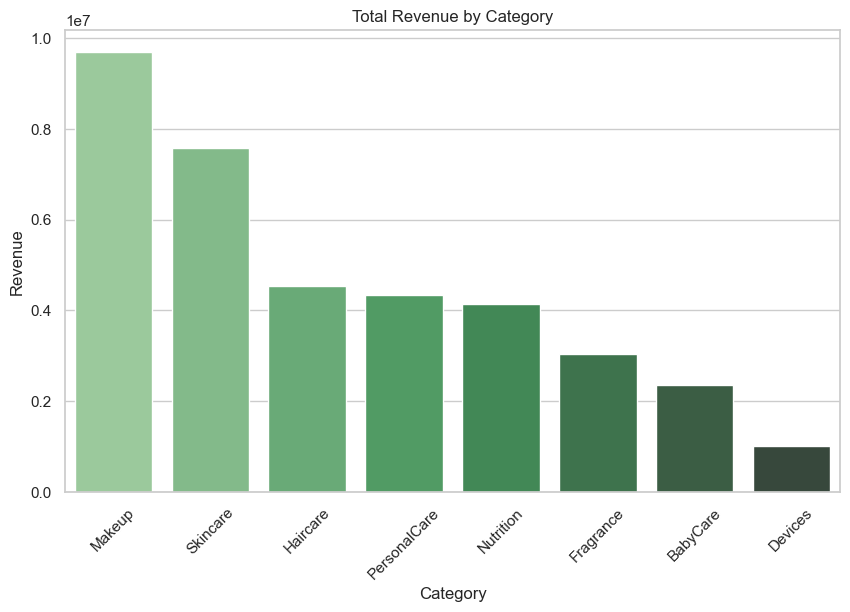

In [27]:
category_perf = (
    df1[df1['category'].notna()]
      .groupby('category')
      .agg(
          revenue=('revenue', 'sum'),
          units_sold=('units_sold', 'sum'),
          ad_spend=('ad_spend', 'sum')
      )
      .reset_index()
)

category_perf['roas'] = category_perf['revenue'] / category_perf['ad_spend']
category_perf['avg_sp'] = category_perf['revenue'] / category_perf['units_sold']

category_perf.sort_values('revenue', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    data=category_perf.sort_values('revenue', ascending=False),
    x='category',
    y='revenue',
    palette='Greens_d'
)
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()



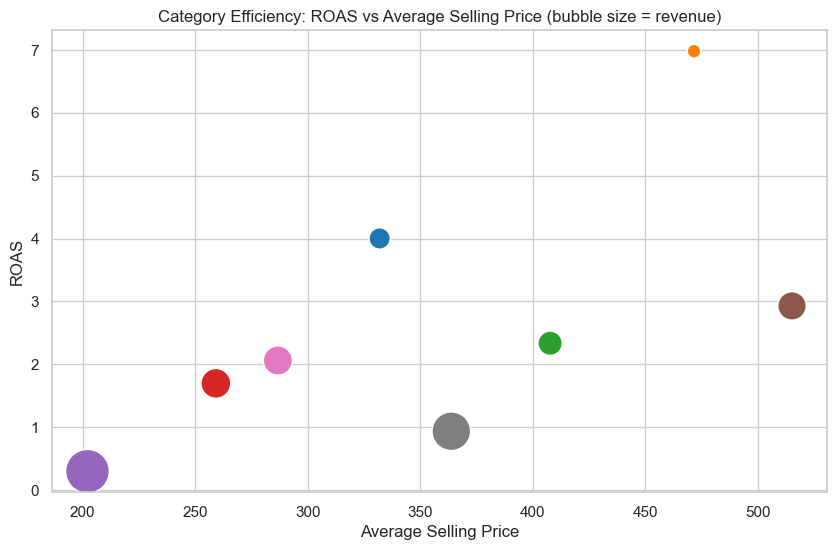

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=category_perf,
    x='avg_sp',
    y='roas',
    size='revenue',  # bubble size = revenue
    hue='category',
    palette='tab10',
    legend=False,
    sizes=(100, 1000)
)
plt.title('Category Efficiency: ROAS vs Average Selling Price (bubble size = revenue)')
plt.xlabel('Average Selling Price')
plt.ylabel('ROAS')
plt.show()


### Product Performance

top revenue products have terrible ROAS

whereas some mid revenue products deliver positive ROAS

C:\Users\AANCHAL\AppData\Local\Temp\ipykernel_23792\735094170.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


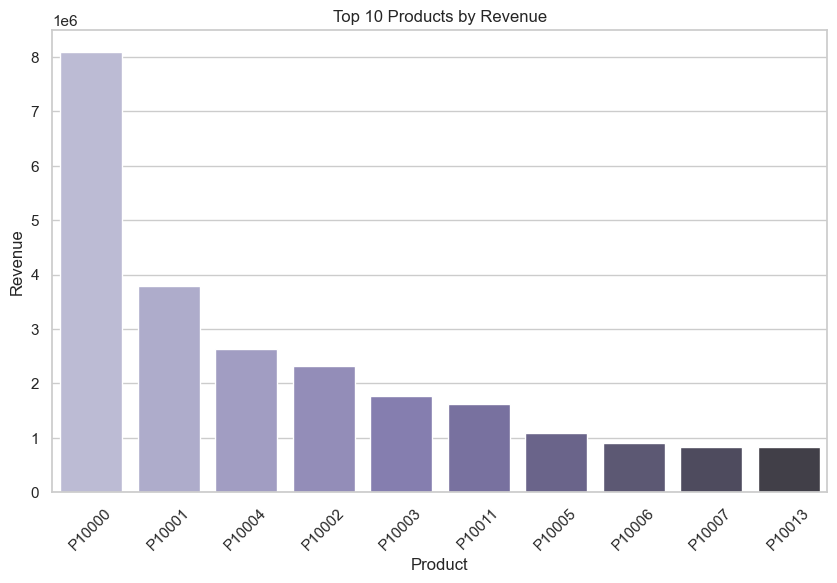

In [29]:
product_perf = (
    df1.groupby('product_id')
       .agg(
           revenue=('revenue', 'sum'),
           units_sold=('units_sold', 'sum'),
           ad_spend=('ad_spend', 'sum')
       )
       .reset_index()
)

product_perf['roas'] = product_perf['revenue'] / product_perf['ad_spend']
product_perf.sort_values('revenue', ascending=False).head(10)

top_products = product_perf.sort_values('revenue', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_products,
    x='product_id',
    y='revenue',
    palette='Purples_d'
)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


In [31]:
# Daily totals across all categories
daily_perf = df1.groupby('date').agg(
    revenue=('revenue', 'sum'),
    clicks=('clicks', 'sum')
).reset_index()

# Category-level totals per day
category_daily = df1.groupby(['category','date']).agg(
    revenue=('revenue','sum'),
    clicks=('clicks','sum')
).reset_index()


In [32]:
daily_std = daily_perf[['revenue','clicks']].std()
print("Platform-level daily volatility:\n", daily_std)

Platform-level daily volatility:
 revenue    622598.261564
clicks     681633.890544
dtype: float64


In [33]:
category_std = category_daily.groupby('category')[['revenue','clicks']].std().reset_index()
category_std.rename(columns={'revenue':'revenue_std','clicks':'clicks_std'}, inplace=True)
print("Category-level daily volatility:\n", category_std)


Category-level daily volatility:
        category    revenue_std     clicks_std
0      BabyCare   37506.481259    3138.199207
1       Devices   24988.736763    1358.392982
2     Fragrance   33902.689729    7552.971842
3      Haircare   59738.250240   15399.949276
4        Makeup  110168.635952  145162.989578
5     Nutrition   59073.910160    9521.854839
6  PersonalCare   53215.841933   12182.053242
7      Skincare  103820.017553   47840.061716


In [34]:
rev_mean = daily_perf['revenue'].mean()
rev_std = daily_perf['revenue'].std()

click_mean = daily_perf['clicks'].mean()
click_std = daily_perf['clicks'].std()

rev_outliers = daily_perf[(daily_perf['revenue'] > rev_mean + 2*rev_std) | (daily_perf['revenue'] < rev_mean - 2*rev_std)]
click_outliers = daily_perf[(daily_perf['clicks'] > click_mean + 2*click_std) | (daily_perf['clicks'] < click_mean - 2*click_std)]

print("Revenue Outlier Days:\n", rev_outliers)
print("Click Outlier Days:\n", click_outliers)


Revenue Outlier Days:
         date     revenue   clicks
1  1/10/2026  3429600.57  3238913
Click Outlier Days:
          date     revenue   clicks
1   1/10/2026  3429600.57  3238913
29   1/8/2026  2420598.91  3170477


In [35]:
category_outliers = category_daily.groupby('category').apply(
    lambda x: x[(x['revenue'] > x['revenue'].mean() + 2*x['revenue'].std()) | 
                (x['revenue'] < x['revenue'].mean() - 2*x['revenue'].std())]
).reset_index(drop=True)

print("Category-level revenue outliers:\n", category_outliers)


Category-level revenue outliers:
         category       date    revenue  clicks
0       BabyCare  1/10/2026  198040.11   14969
1        Devices  1/25/2026  131810.63    5297
2      Fragrance  1/18/2026   29089.09    8724
3      Fragrance   1/4/2026  171092.85   31227
4       Haircare  1/10/2026  306255.29   54221
5       Haircare   1/4/2026  277815.10   78748
6         Makeup  1/10/2026  571054.73  700785
7      Nutrition  1/10/2026  313129.12   41050
8   PersonalCare  1/10/2026  279580.30   64835
9   PersonalCare   1/3/2026  253364.86   33734
10      Skincare  1/10/2026  528623.76  227041
11      Skincare   1/3/2026  488895.21  148532


C:\Users\AANCHAL\AppData\Local\Temp\ipykernel_23792\1029771739.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_outliers = category_daily.groupby('category').apply(


In [39]:
# Category-level correlation
category_corr = category_perf[['revenue','ad_spend']].corr().iloc[0,1]
print(f"Category-level correlation between ad spend and revenue: {category_corr:.2f}")


Category-level correlation between ad spend and revenue: 0.86


In [ ]:
import pandas as pd

# Group by product and calculate mean & std
stats = df1.groupby('product_id')['revenue'].agg(['mean', 'std']).reset_index()

# Merge stats back to original data
sales = df1.merge(stats, on='product_id')
sales['z_score'] = (sales['revenue'] - sales['mean']) / sales['std']

# Flag anomalies: z-score > 2 or < -2
anomalies = sales[(sales['z_score'] > 2) | (sales['z_score'] < -2)]
print(anomalies[['product_id', 'date', 'revenue', 'z_score']])

      product_id       date   revenue   z_score
9         P10000   1/1/2026   7278.76  3.021713
28        P10000   1/1/2026   9077.96  4.089853
44        P10000   1/1/2026   5707.99  2.089185
47        P10000   1/1/2026   6400.56  2.500347
57        P10000   1/1/2026   6143.65  2.347826
...          ...        ...       ...       ...
17903     P10087  1/31/2026   9403.36  2.201600
17921     P10117  1/31/2026   5335.89  2.173177
17923     P10118  1/31/2026  19202.31  2.521852
17927     P10125  1/31/2026   7880.63  2.009520
17945     P10199  1/31/2026   5679.42  2.050171

[729 rows x 4 columns]


Summary

Platform ROAS was 0.34, indicating low ad efficiency. Makeup and Skincare were high-revenue but inefficient categories. BabyCare, Devices, and Nutrition were profitable and efficient. Volatility analysis highlighted unusual spikes in revenue and clicks. Correlation between ad spend and revenue was strong at 0.86, showing ads were generally effective. Product-level analysis showed top revenue products often had poor ROAS, while some mid-revenue products were profitable.